# Global Power-Plant Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
ppl=pd.read_csv('Global_Power-Plant.csv')
ppl

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ppl.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [10]:
ppl.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [3]:
ppl['country'].unique()

array(['IND'], dtype=object)

In [4]:
ppl['country_long'].unique()

array(['India'], dtype=object)

In [12]:
ppl['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [16]:
ppl.shape

(907, 27)

# Data Cleaning:-

In [17]:
ppl.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Above observation shows that many features/columns are having null values in the dataset.

In [3]:
ppl.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Observations shows that some columns are integer and float type and rest are object type.

In [4]:
ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [32]:
ppl.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [34]:
ppl['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [35]:
ppl['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

In [36]:
ppl['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [37]:
ppl['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [38]:
ppl['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [39]:
ppl['generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

In [41]:
ppl['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [30]:
ppl['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [31]:
ppl['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [16]:
ppl['other_fuel3'].unique() # irrelevant column

array([nan])

In [15]:
ppl['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [17]:
ppl['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [20]:
ppl['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [22]:
ppl['wepp_id'].unique() # irrelevant column

array([nan])

In [23]:
ppl['generation_gwh_2013'].unique() # irrelevant column

array([nan])

In [24]:
ppl['generation_gwh_2019'].unique() # irrelevant column

array([nan])

In [25]:
ppl['estimated_generation_gwh'].unique() # irrelevant column

array([nan])

# EDA:-

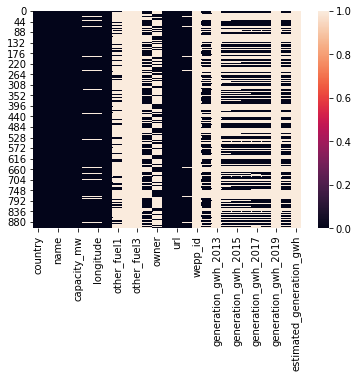

In [5]:
sns.heatmap(ppl.isnull())
plt.show()

This above heatmap displays that null values are present in this dataset.

In [6]:
ppl

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping irrelevant columns which are completely null in this dataset:-

ppl=ppl.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1)
ppl

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
ppl.shape

(907, 22)

In [44]:
ppl.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [6]:
ppl_g = ppl.copy()
ppl_g['other_fuel1'].fillna(ppl_g['other_fuel1'].value_counts().idxmax(), inplace=True)
ppl_g['other_fuel2'].fillna(ppl_g['other_fuel2'].value_counts().idxmax(), inplace=True)
ppl_g['owner'].fillna(ppl_g['owner'].value_counts().idxmax(), inplace=True)
ppl_g['geolocation_source'].fillna(ppl_g['geolocation_source'].value_counts().idxmax(), inplace=True)
ppl_g['year_of_capacity_data'].fillna(ppl_g['year_of_capacity_data'].value_counts().idxmax(), inplace=True)
ppl_g['generation_data_source'].fillna(ppl_g['generation_data_source'].value_counts().idxmax(), inplace=True)
ppl_g["latitude"].fillna(ppl_g["latitude"].mean(skipna=True), inplace=True)
ppl_g["longitude"].fillna(ppl_g["longitude"].mean(skipna=True), inplace=True)
ppl_g["commissioning_year"].fillna(ppl_g["commissioning_year"].mean(skipna=True), inplace=True)
ppl_g["generation_gwh_2014"].fillna(ppl_g["generation_gwh_2014"].mean(skipna=True), inplace=True)
ppl_g["generation_gwh_2015"].fillna(ppl_g["generation_gwh_2015"].mean(skipna=True), inplace=True)
ppl_g["generation_gwh_2016"].fillna(ppl_g["generation_gwh_2016"].mean(skipna=True), inplace=True)
ppl_g["generation_gwh_2017"].fillna(ppl_g["generation_gwh_2017"].mean(skipna=True), inplace=True)
ppl_g["generation_gwh_2018"].fillna(ppl_g["generation_gwh_2018"].mean(skipna=True), inplace=True)

In [7]:
ppl_g

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,Oil,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Oil,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,Oil,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Oil,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Oil,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Oil,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Oil,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,Oil,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Oil,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority


In [49]:
ppl_g.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now, no null values are there.

In [51]:
ppl_g.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
other_fuel2                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [8]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

val=['country','country_long','name','gppd_idnr','primary_fuel','other_fuel1','other_fuel2','owner','source','url',
     'geolocation_source','generation_data_source']
for i in val:
    ppl_g[i]=le.fit_transform(ppl_g[i])

In [10]:
ppl_g

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,2,0,...,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,0,1,519,98.0,24.7663,74.6090,1,2,0,...,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,0,2,853,39.2,21.9038,69.3732,7,2,0,...,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,0,3,0,135.0,23.8712,91.3602,2,2,0,...,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,0,...,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,0,...,22,58,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,0,0,903,822,3.0,12.8932,78.1654,6,2,0,...,77,22,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
904,0,0,904,891,25.5,15.2758,75.5811,7,2,0,...,21,260,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
905,0,0,905,539,80.0,24.3500,73.7477,1,2,0,...,59,82,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0


In [54]:
ppl_g.dtypes

country                     int32
country_long                int32
name                        int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
other_fuel2                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int32
dtype: object

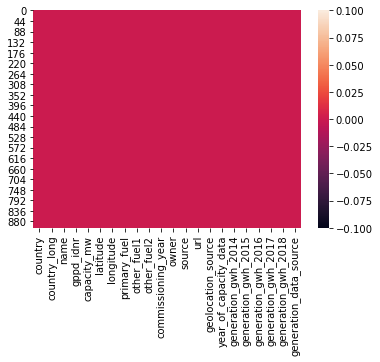

In [55]:
sns.heatmap(ppl_g.isnull())
plt.show()

Above heatmap shows that no null values are there in our dataset now.

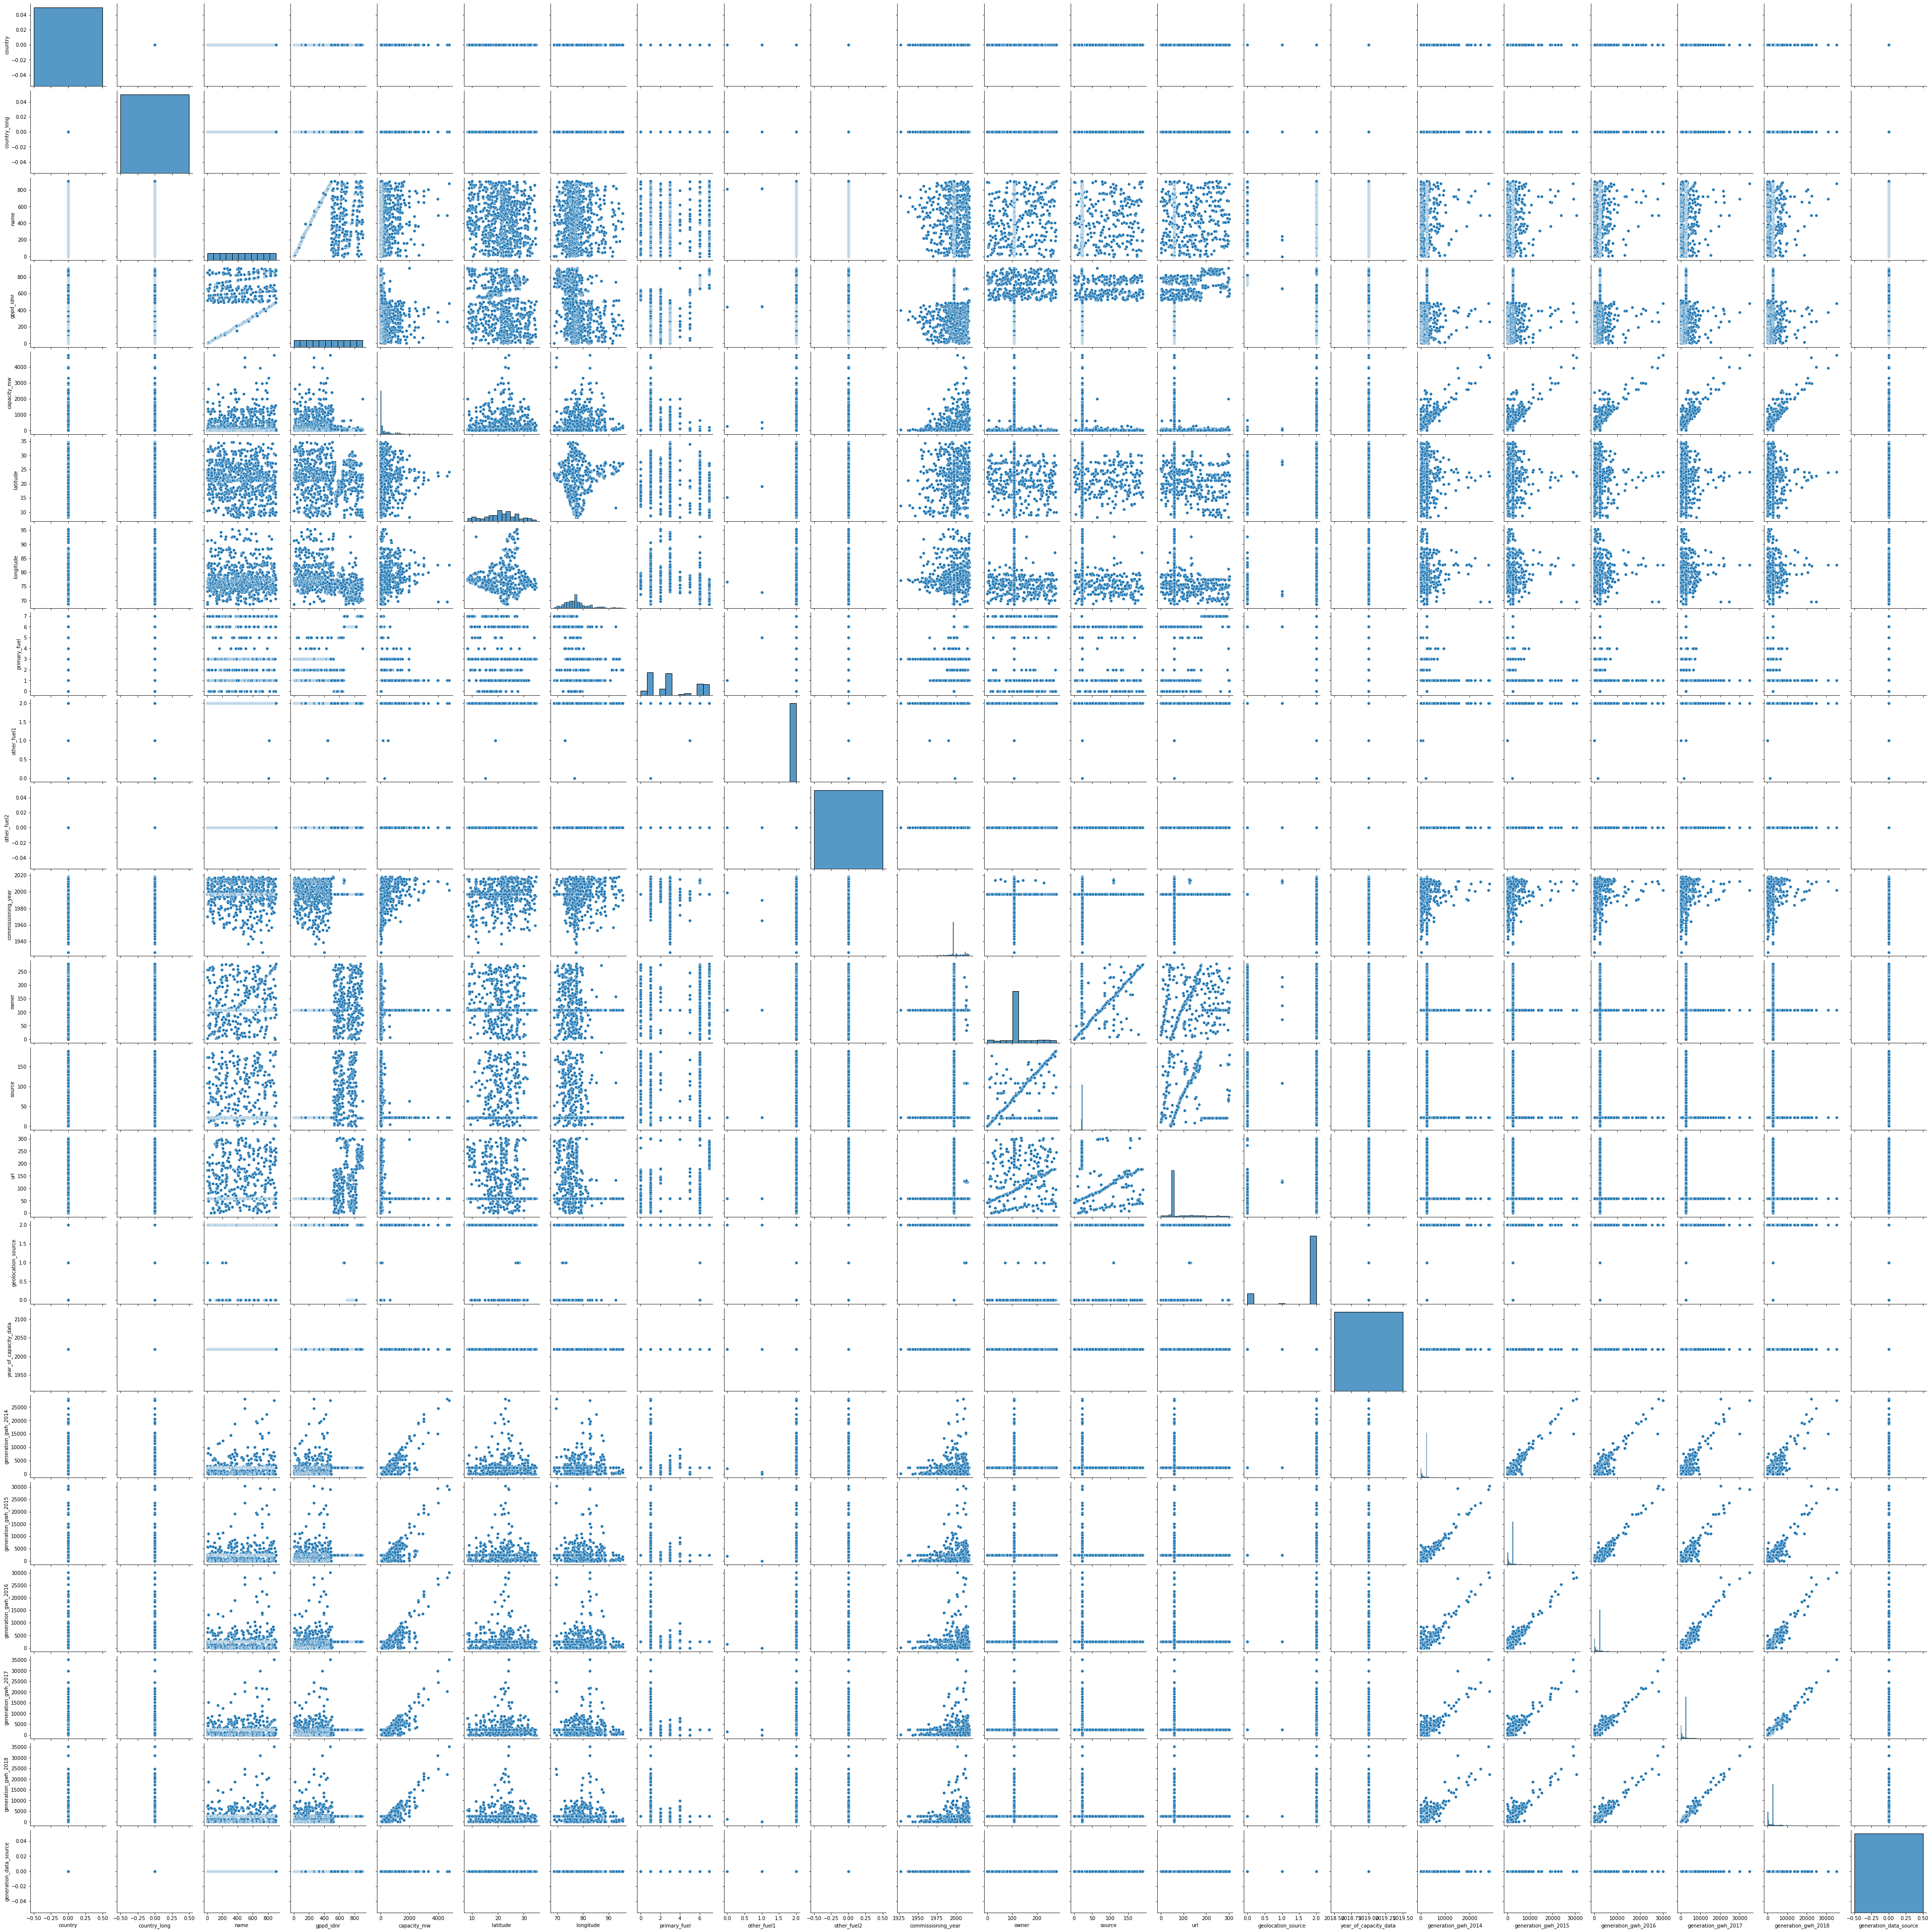

In [11]:
sns.pairplot(ppl_g)
plt.show()

# Correlation:-

In [12]:
# 1. Checking the Correlation with respect to first target variable(Primary Fuel):-

ppl_g.corr()['primary_fuel'].sort_values()

geolocation_source       -0.483217
capacity_mw              -0.380395
longitude                -0.347948
generation_gwh_2018      -0.136983
generation_gwh_2017      -0.132003
generation_gwh_2016      -0.131051
commissioning_year       -0.126650
generation_gwh_2015      -0.124828
generation_gwh_2014      -0.124769
latitude                 -0.010204
other_fuel1               0.004912
name                      0.040753
source                    0.053613
owner                     0.124161
url                       0.589886
gppd_idnr                 0.609180
primary_fuel              1.000000
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

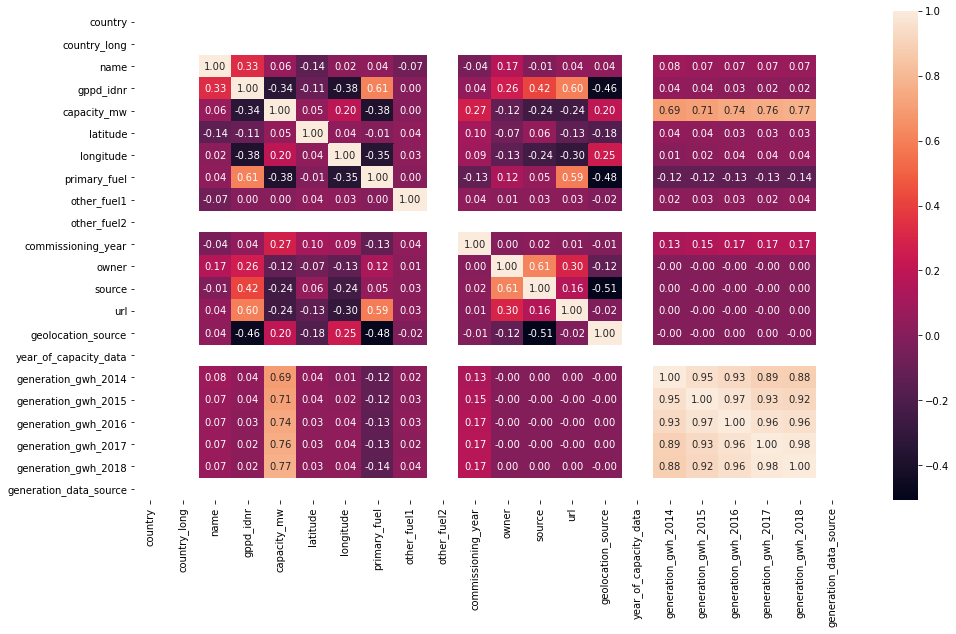

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(ppl_g.corr(),annot=True,fmt='0.2f')
plt.show()

Above heatmap shows that 'latitude','other_fuel1','name' and 'source' less correlated with the target variable 'primary_fuel'.

Making new dataframe in terms of primary fuel analysis:-

In [15]:
ppl_g1=ppl_g.drop(['latitude','other_fuel1','name','source','country','country_long','other_fuel2',
                   'year_of_capacity_data','generation_data_source'],axis=1)
ppl_g1

,gppd_idnr,capacity_mw,longitude,primary_fuel,commissioning_year,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,73.2407,6,2011.000000,229,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,74.6090,1,1997.091082,258,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,69.3732,7,1997.091082,2,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,91.3602,2,2004.000000,108,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,82.4091,1,2015.000000,108,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,77.3568,1,2016.000000,108,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,78.1654,6,1997.091082,114,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,75.5811,7,1997.091082,108,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,73.7477,1,1997.091082,91,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [16]:
ppl_g1.shape

(907, 13)

In [17]:
# checking for the skewness:-

ppl_g1.skew()

gppd_idnr              0.000000
capacity_mw            3.123576
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.399359
owner                  1.019702
url                    1.510537
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

Above observations shows that 'capacity_mw','commissioning_year','generation_gwh_2014','generation_gwh_2015',
'generation_gwh_2016','generation_gwh_2017' and 'generation_gwh_2018' are higly skewed.

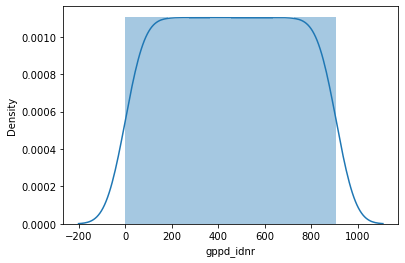

In [18]:
# checking with the distribution curve:-

sns.distplot(ppl_g1['gppd_idnr'])
plt.show()

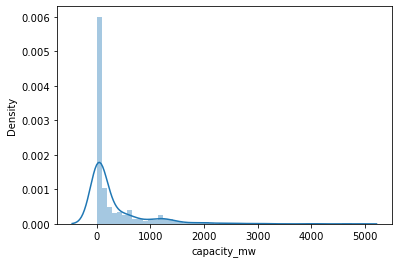

In [19]:
sns.distplot(ppl_g1['capacity_mw'])
plt.show()

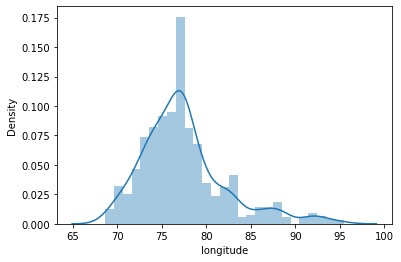

In [20]:
sns.distplot(ppl_g1['longitude'])
plt.show()

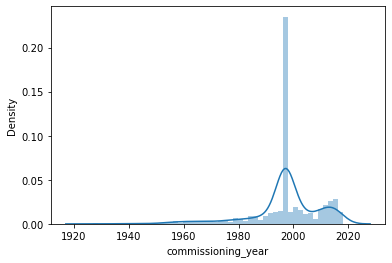

In [22]:
sns.distplot(ppl_g1['commissioning_year'])
plt.show()

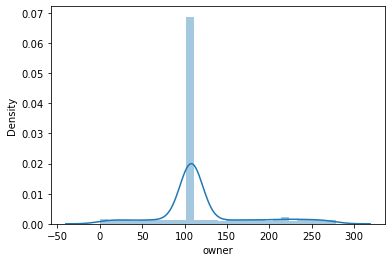

In [23]:
sns.distplot(ppl_g1['owner'])
plt.show()

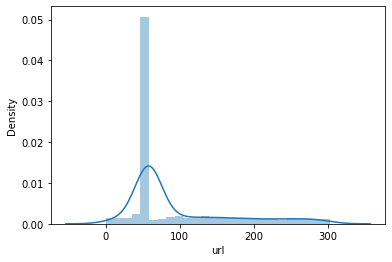

In [24]:
sns.distplot(ppl_g1['url'])
plt.show()

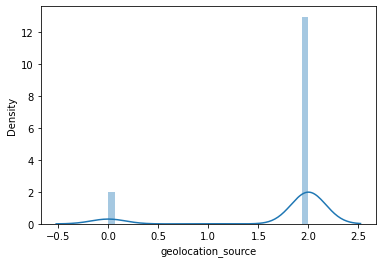

In [26]:
sns.distplot(ppl_g1['geolocation_source'])
plt.show()

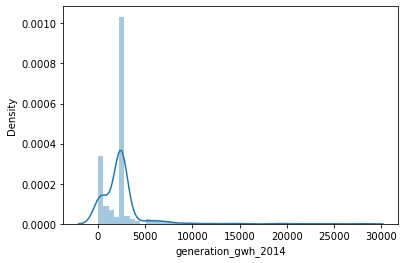

In [27]:
sns.distplot(ppl_g1['generation_gwh_2014'])
plt.show()

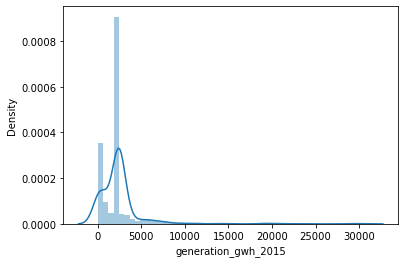

In [28]:
sns.distplot(ppl_g1['generation_gwh_2015'])
plt.show()

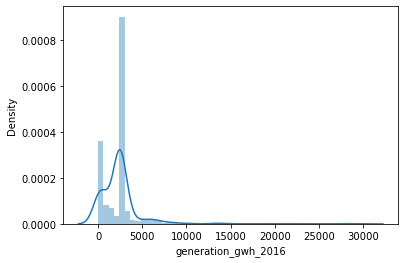

In [29]:
sns.distplot(ppl_g1['generation_gwh_2016'])
plt.show()

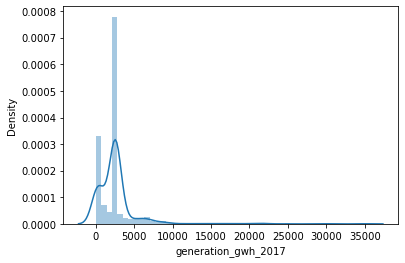

In [30]:
sns.distplot(ppl_g1['generation_gwh_2017'])
plt.show()

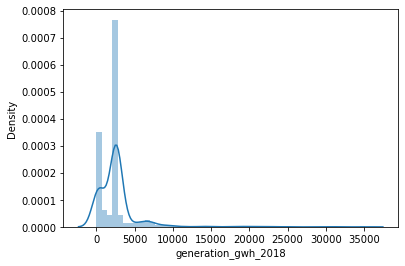

In [31]:
sns.distplot(ppl_g1['generation_gwh_2018'])
plt.show()

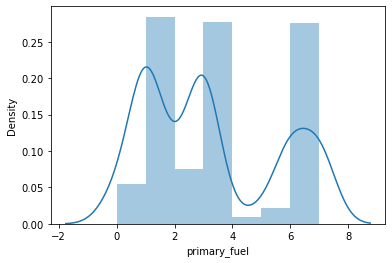

In [32]:
sns.distplot(ppl_g1['primary_fuel'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed.
The building blocks is out of normalized curve.

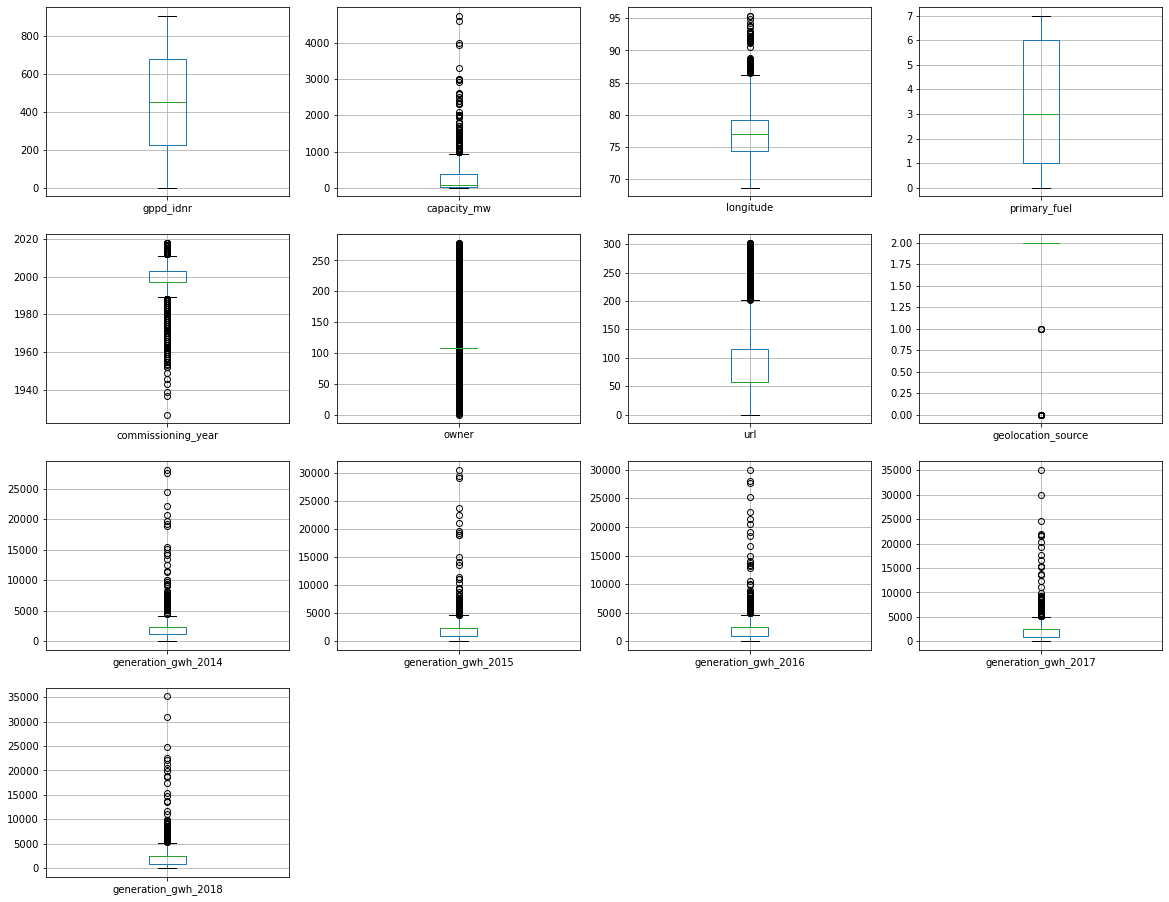

In [33]:
# Outliers Removal:-

ppl_g1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(ppl_g1))
z

array([[7.79136890e-01, 5.48907549e-01, 8.78279731e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [2.52073700e-01, 3.86977292e-01, 5.93788441e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [1.52771939e+00, 4.86678853e-01, 1.68239437e+00, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       ...,
       [1.67285273e+00, 5.09908639e-01, 3.91673420e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [3.28459669e-01, 4.17498178e-01, 7.72866383e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [1.61556326e+00, 5.25169082e-01, 2.47270171e-03, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16]])

In [35]:
# index no.

np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 246, 308, 308,
        308, 308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364,
        364, 364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493,
        493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519,
        538, 541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648,
        648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
        695, 695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724,
        726, 726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786,
        786, 788, 807, 808, 808, 808, 808, 808, 808, 818, 847, 848, 880,
        880, 880, 880, 880, 880, 906], dtype=int64),
 array([ 1,  9, 10, 11, 12,  1,  8,  9, 10, 11, 12,  1,  8,  2,  2,  1,  8,
         9, 10, 11, 12,  4,  2,  5,  1,  8,  9, 10, 11, 12,  2,  2,  2,  4,
         2,  1,  1,  8,  9, 10, 11, 12,  4,  1,  2,  2,  4,  4,  

In [36]:
pplg1_new=ppl_g1[(z<3).all(axis=1)]
pplg1_new

,gppd_idnr,capacity_mw,longitude,primary_fuel,commissioning_year,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,73.2407,6,2011.000000,229,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,74.6090,1,1997.091082,258,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,69.3732,7,1997.091082,2,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,91.3602,2,2004.000000,108,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,82.4091,1,2015.000000,108,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,490,106.6,77.5838,5,1993.000000,108,58,2,0.000000,0.000000,0.000000,2547.759305,0.000000
902,491,1600.0,77.3568,1,2016.000000,108,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,78.1654,6,1997.091082,114,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,75.5811,7,1997.091082,108,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [37]:
ppl_g1.shape

(907, 13)

In [38]:
pplg1_new.shape

(847, 13)

In [39]:
# percentage data loss:-

loss_percent=(907-847)/(907*100)
print(loss_percent,'%')

0.000661521499448732 %


In [40]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X1=power_transform(ppl_g1,method='yeo-johnson')
X1

array([[ 0.79063305, -1.69576688, -0.95254457, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 0.33133539,  0.19369368, -0.54497608, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 1.39746613, -0.2923371 , -2.3798638 , ...,  0.31578736,
         0.31292509,  0.32193752],
       ...,
       [ 1.51018594, -0.52277344, -0.28081924, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 0.39991495,  0.08691496, -0.79637432, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 1.4658612 , -0.75589054,  0.18088944, ...,  0.31578736,
         0.31292509,  0.32193752]])

In [41]:
X1.ndim

2

In [42]:
X1.std()

1.0

In [43]:
x=pplg1_new.drop(['primary_fuel'],axis=1)
x

,gppd_idnr,capacity_mw,longitude,commissioning_year,owner,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,73.2407,2011.000000,229,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,74.6090,1997.091082,258,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,69.3732,1997.091082,2,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,91.3602,2004.000000,108,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,82.4091,2015.000000,108,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
901,490,106.6,77.5838,1993.000000,108,58,2,0.000000,0.000000,0.000000,2547.759305,0.000000
902,491,1600.0,77.3568,2016.000000,108,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,78.1654,1997.091082,114,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,75.5811,1997.091082,108,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [44]:
y=pplg1_new['primary_fuel']
y

0      6
1      1
2      7
3      2
4      1
      ..
901    5
902    1
903    6
904    7
905    1
Name: primary_fuel, Length: 847, dtype: int32

# Machine Learning Algorithms Training and Testing of Primary Fuel:-

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State:-

In [46]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

mnb=MultinomialNB()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mnb.fit(x_train,y_train)
    pred_mnb=mnb.predict(x_test)
    acc=accuracy_score(y_test,pred_mnb)
    print('accuracy',acc,'random_state',i)
    print('\n')
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.3764705882352941 random_state 0


max_accuracy 0.3764705882352941 max_random_state 0
accuracy 0.4176470588235294 random_state 1


max_accuracy 0.4176470588235294 max_random_state 1
accuracy 0.4647058823529412 random_state 2


max_accuracy 0.4647058823529412 max_random_state 2
accuracy 0.4117647058823529 random_state 3


accuracy 0.5176470588235295 random_state 4


max_accuracy 0.5176470588235295 max_random_state 4
accuracy 0.4 random_state 5


accuracy 0.47058823529411764 random_state 6


accuracy 0.4117647058823529 random_state 7


accuracy 0.49411764705882355 random_state 8


accuracy 0.4411764705882353 random_state 9


accuracy 0.5529411764705883 random_state 10


max_accuracy 0.5529411764705883 max_random_state 10
accuracy 0.4294117647058823 random_state 11


accuracy 0.4 random_state 12


accuracy 0.4117647058823529 random_state 13


accuracy 0.38235294117647056 random_state 14


accuracy 0.4294117647058823 random_state 15


accuracy 0.43529411764705883 random_state 16


In [47]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.5529411764705883 on Random_state 10


In [48]:
# Naive Bayes Classifier;

mnb=MultinomialNB()

mnb.fit(x_train,y_train)
pred_mnb=mnb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)
print(confusion_matrix(y_test,pred_mnb))
print(classification_report(y_test,pred_mnb))

Accuracy 47.05882352941176
[[ 9  0  0  0  0  0  1  0]
 [ 6  5  8  2 18  0  1  0]
 [ 3  0  7  2  0  0  0  0]
 [12  2 28  7  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  0]
 [ 1  1  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.28      0.90      0.43        10
           1       0.56      0.12      0.20        40
           2       0.16      0.58      0.25        12
           3       0.64      0.14      0.23        49
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.91      0.88      0.89        24
           7       0.97      1.00      0.98        31

    accuracy                           0.47       170
   macro avg       0.44      0.45      0.37       170
weighted avg       0.65      0.47      0.46       170



In [49]:
# Support vector classifier;

from sklearn.svm import SVC
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 48.23529411764706
[[ 0  0  0  0  0  0 10  0]
 [ 0 27  0  6  0  0  7  0]
 [ 0  1  0  8  0  0  3  0]
 [ 0 14  0 31  0  0  4  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0 31  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.63      0.68      0.65        40
           2       0.00      0.00      0.00        12
           3       0.66      0.63      0.65        49
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.30      1.00      0.46        24
           7       0.00      0.00      0.00        31

    accuracy                           0.48       170
   macro avg       0.20      0.29      0.22       170
weighted avg       0.38      0.48      0.40       170



In [50]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.0
[[ 5  5  0  0  0  0  0  0]
 [ 1 28  5  5  1  0  0  0]
 [ 0  1  5  6  0  0  0  0]
 [ 0  2  6 41  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.78      0.70      0.74        40
           2       0.29      0.42      0.34        12
           3       0.77      0.84      0.80        49
           4       0.00      0.00      0.00         1
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        31

    accuracy                           0.80       170
   macro avg       0.71      0.64      0.66       170
weighted avg       0.82      0.80      0.80       170



In [51]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 85.88235294117646
[[ 7  3  0  0  0  0  0  0]
 [ 1 34  2  3  0  0  0  0]
 [ 0  1  5  6  0  0  0  0]
 [ 0  4  1 44  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.79      0.85      0.82        40
           2       0.50      0.42      0.45        12
           3       0.83      0.90      0.86        49
           4       0.00      0.00      0.00         1
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        31

    accuracy                           0.86       170
   macro avg       0.75      0.65      0.68       170
weighted avg       0.85      0.86      0.85       170



In [52]:
# Ada Boost Classifier;

from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_ad)*100)
print(confusion_matrix(y_test,pred_ad))
print(classification_report(y_test,pred_ad))

Accuracy 58.82352941176471
[[ 0 10  0  0  0  0  0  0]
 [ 0 39  0  0  1  0  0  0]
 [ 0 12  0  0  0  0  0  0]
 [ 0 43  0  6  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.36      0.97      0.53        40
           2       0.00      0.00      0.00        12
           3       1.00      0.12      0.22        49
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        31

    accuracy                           0.59       170
   macro avg       0.42      0.39      0.34       170
weighted avg       0.70      0.59      0.51       170



Therefore, Random Forest Classifier shows the best metrics results among other models.

In [53]:
# Cross Validation for Naive Bayes Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(mnb,x_train,y_train,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_mnb)*100)

Cross validation score of Logistic Regression model: [0.43421053 0.36842105 0.44       0.41333333 0.38666667 0.41333333
 0.50666667 0.46666667 0.44      ]
Mean of Cross validation score: 0.4299220272904483
Accuracy 47.05882352941176


In [54]:
# Cross Validation for  support vector classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(svc,x_train,y_train,cv=9)
print('Cross validation score of Support Vector Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predsvc)*100)

Cross validation score of Support Vector Classifier model: [0.42105263 0.47368421 0.41333333 0.49333333 0.41333333 0.46666667
 0.44       0.4        0.46666667]
Mean of Cross validation score: 0.4431189083820663
Accuracy 48.23529411764706


In [55]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_train,y_train,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.73684211 0.72368421 0.72       0.77333333 0.76       0.82666667
 0.78666667 0.8        0.8       ]
Mean of Cross validation score: 0.7696881091617933
Accuracy 80.0


In [56]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_train,y_train,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.76315789 0.80263158 0.84       0.81333333 0.84       0.85333333
 0.84       0.85333333 0.85333333]
Mean of Cross validation score: 0.8287914230019493
Accuracy 85.88235294117646


In [57]:
# Cross Validation for AdaBoost classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(ad,x_train,y_train,cv=9)
print('Cross validation score of AdaBoost Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Classifier model: [0.59210526 0.55263158 0.44       0.61333333 0.48       0.42666667
 0.46666667 0.62666667 0.58666667]
Mean of Cross validation score: 0.5316374269005848
Accuracy 58.82352941176471


Therefore the difference between cv score and r2 score in very less in case of Random Forest Classifier that is[0.858-0.853=0.005],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [58]:
RandomForestClassifier()

RandomForestClassifier()

In [59]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7],
            'criterion':['gini','entropy'],
            'n_estimators':[100,200,300,400]}

In [60]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=parameters,cv=6,
                scoring=accuracy_score)

In [61]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 100}

In [62]:
rf=RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_accuracy=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
rfs=cross_val_score(rf,x,y,cv=6)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.7976366322008862
Accuracy_Score 0.8058823529411765
Cross_Val_Score 79.76366322008862


In [63]:
GCV.best_estimator_

RandomForestClassifier(max_depth=4, max_features='auto')

Therefore,we are getting our model accuracy 80.5% with almost same cross-validation score(79.7%) which shows that there is a 
less difference between CV score and Accuracy score. So,our model is performing "good enough".

# Saving the Model_1:-

In [65]:
import pickle
filename='Power-Plant_Primary_Fuel_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [67]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
Power_Plant_Primary_Fuel_Prediction=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Power_Plant_Primary_Fuel_Prediction

,original,predicted
0,1,1
1,7,7
2,6,6
3,3,3
4,1,1
...,...,...
165,0,0
166,1,1
167,7,7
168,3,3


In [101]:
# 2. Checking the Correlation with respect to second target variable(Capacity_MW):-

ppl_g.corr()['capacity_mw'].sort_values()

primary_fuel             -0.380395
gppd_idnr                -0.335742
url                      -0.243830
source                   -0.242122
owner                    -0.124160
other_fuel1               0.003105
latitude                  0.050984
name                      0.060240
longitude                 0.195882
geolocation_source        0.204865
commissioning_year        0.274292
generation_gwh_2014       0.694350
generation_gwh_2015       0.711190
generation_gwh_2016       0.742221
generation_gwh_2017       0.757585
generation_gwh_2018       0.773456
capacity_mw               1.000000
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

Therefore, 'other_fuel1','latitude', and 'name' are less correlated with the target variable 'capacity_mw'.

Making new dataframe in terms of capacity_mw analysis:-

In [102]:
ppl_g2=ppl_g.drop(['latitude','other_fuel1','name','country','country_long','other_fuel2',
                   'year_of_capacity_data','generation_data_source'],axis=1)
ppl_g2

,gppd_idnr,capacity_mw,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,73.2407,6,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,74.6090,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,69.3732,7,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,91.3602,2,2004.000000,108,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,82.4091,1,2015.000000,108,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,491,1600.0,77.3568,1,2016.000000,108,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,78.1654,6,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,75.5811,7,1997.091082,108,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,539,80.0,73.7477,1,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [70]:
ppl_g2.shape

(907, 14)

In [103]:
# checking for the skewness:-

ppl_g2.skew()

gppd_idnr              0.000000
capacity_mw            3.123576
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.399359
owner                  1.019702
source                 1.827373
url                    1.510537
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

Above observations shows that 'capacity_mw','commissioning_year','generation_gwh_2014','generation_gwh_2015',
'generation_gwh_2016','generation_gwh_2017' and 'generation_gwh_2018' are higly skewed.

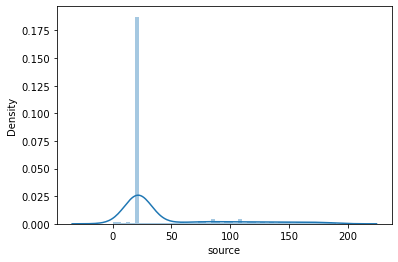

In [104]:
sns.distplot(ppl_g2['source'])
plt.show()

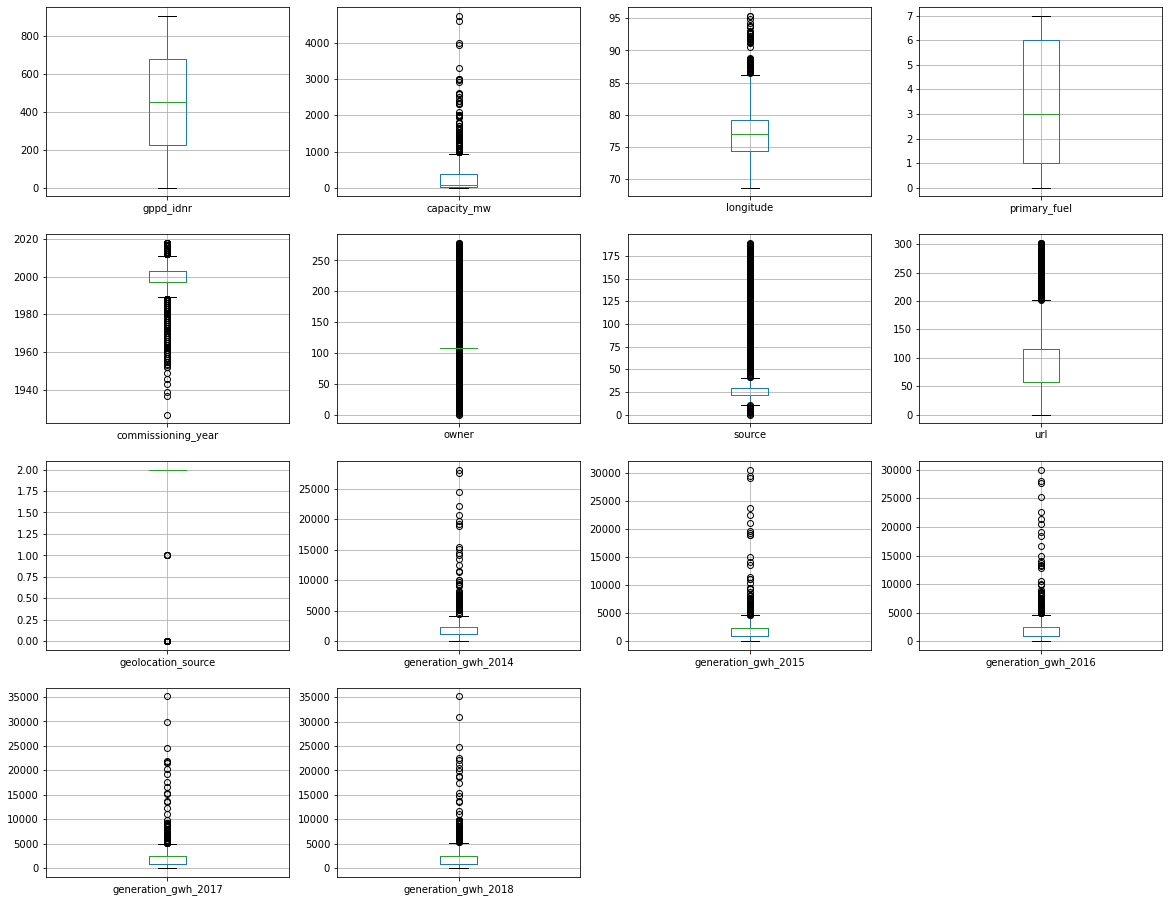

In [105]:
# Outliers Removal:-

ppl_g2.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [106]:
from scipy.stats import zscore
z=np.abs(zscore(ppl_g2))
z

array([[7.79136890e-01, 5.48907549e-01, 8.78279731e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [2.52073700e-01, 3.86977292e-01, 5.93788441e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [1.52771939e+00, 4.86678853e-01, 1.68239437e+00, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       ...,
       [1.67285273e+00, 5.09908639e-01, 3.91673420e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [3.28459669e-01, 4.17498178e-01, 7.72866383e-01, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16],
       [1.61556326e+00, 5.25169082e-01, 2.47270171e-03, ...,
        0.00000000e+00, 1.55741196e-16, 1.50124402e-16]])

In [107]:
# index no.

np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        246, 299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342,
        345, 360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427,
        444, 454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494,
        494, 494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592,
        601, 621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709,
        721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726,
        726, 726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808,
        808, 808, 808, 808, 808, 818, 832, 847, 848, 870, 871, 879, 880,
        880, 880, 880, 880, 880, 895, 900, 906], dtype=int64),
 array([ 1, 10, 11, 12, 13,  6,  6,  1,  9, 10, 11, 12, 13,  1,  9,  2,  2,
         6,  1,  9, 10, 11, 12, 13,  4,  2,  5,  6,  1,  9

In [108]:
pplg2_new=ppl_g2[(z<3).all(axis=1)]
pplg2_new

,gppd_idnr,capacity_mw,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,73.2407,6,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,74.6090,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,69.3732,7,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,91.3602,2,2004.000000,108,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,82.4091,1,2015.000000,108,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,490,106.6,77.5838,5,1993.000000,108,22,58,2,0.000000,0.000000,0.000000,2547.759305,0.000000
902,491,1600.0,77.3568,1,2016.000000,108,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,3.0,78.1654,6,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,25.5,75.5811,7,1997.091082,108,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [79]:
ppl_g2.shape

(907, 14)

In [80]:
pplg2_new.shape

(832, 14)

In [81]:
# percentage data loss:-

loss_percent=(907-832)/(907*100)
print(loss_percent,'%')

0.0008269018743109151 %


In [109]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X2=power_transform(ppl_g2,method='yeo-johnson')
X2

array([[ 0.79063305, -1.69576688, -0.95254457, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 0.33133539,  0.19369368, -0.54497608, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 1.39746613, -0.2923371 , -2.3798638 , ...,  0.31578736,
         0.31292509,  0.32193752],
       ...,
       [ 1.51018594, -0.52277344, -0.28081924, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 0.39991495,  0.08691496, -0.79637432, ...,  0.31578736,
         0.31292509,  0.32193752],
       [ 1.4658612 , -0.75589054,  0.18088944, ...,  0.31578736,
         0.31292509,  0.32193752]])

In [83]:
X2.ndim

2

In [84]:
X2.std()

1.0

In [110]:
x1=pplg2_new.drop(['capacity_mw'],axis=1)
x1

,gppd_idnr,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,73.2407,6,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,74.6090,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,69.3732,7,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,91.3602,2,2004.000000,108,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,82.4091,1,2015.000000,108,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,490,77.5838,5,1993.000000,108,22,58,2,0.000000,0.000000,0.000000,2547.759305,0.000000
902,491,77.3568,1,2016.000000,108,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,822,78.1654,6,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,891,75.5811,7,1997.091082,108,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [111]:
y1=pplg2_new['capacity_mw']
y1

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
901     106.6
902    1600.0
903       3.0
904      25.5
905      80.0
Name: capacity_mw, Length: 832, dtype: float64

# Machine Learning Algorithms Training and Testing of Capacity_MW:-

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_absolute_error as mae

In [113]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state train",{i},train_accuracy)
    print("At random state test",{i},test_accuracy)
    print("\n")
    print('Mean-squared-error: ',mse(y_test,pred_test))
    print('Mean-absolute-error: ',mae(y_test,pred_test))
    print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_test)))
    print('R2 SCore: ',r2_score(y_test,pred_test))

At random state train {0} 0.6320490959499263
At random state test {0} 0.5144660106889023


Mean-squared-error:  96546.10557467243
Mean-absolute-error:  222.9997034495958
Root-Mean-squared-error:  310.7186920265217
R2 SCore:  0.5144660106889023
At random state train {1} 0.6380071306100714
At random state test {1} 0.4659907406397561


Mean-squared-error:  93852.26175421469
Mean-absolute-error:  192.65066952025853
Root-Mean-squared-error:  306.3531650794793
R2 SCore:  0.4659907406397561
At random state train {2} 0.5916134920573152
At random state test {2} 0.6363617238799265


Mean-squared-error:  80372.39416438194
Mean-absolute-error:  194.79397690900046
Root-Mean-squared-error:  283.5002542580552
R2 SCore:  0.6363617238799265
At random state train {3} 0.625959656904227
At random state test {3} 0.5199807610903278


Mean-squared-error:  84065.8440689237
Mean-absolute-error:  177.30727148151877
Root-Mean-squared-error:  289.94110448317554
R2 SCore:  0.5199807610903278
At random state train 

In [114]:
print('Best accuraccy(R2 Score) is ',0.734, 'on random_state',5)

Best accuraccy(R2 Score) is  0.734 on random_state 5


In [115]:
# Choosing the best random state in linear regression

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=5)

In [116]:
# Linear Regression;

lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("R2 Score",r2_score(y_test,predlr)*100)
print('Mean-squared-error: ',mse(y_test,predlr))
print('Mean-absolute-error: ',mae(y_test,predlr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predlr)))

R2 Score 49.955480707737046
Mean-squared-error:  81207.05554411546
Mean-absolute-error:  178.74394931958233
Root-Mean-squared-error:  284.9685167595106


In [117]:
#lasso regression;


from sklearn.linear_model import Lasso,Ridge
 
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ls)*100)
print('Mean-squared-error: ',mse(y_test,pred_ls))
print('Mean-absolute-error: ',mae(y_test,pred_ls))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ls)))

R2 Score 49.955480308313696
Mean-squared-error:  81207.05619225824
Mean-absolute-error:  178.74392267615966
Root-Mean-squared-error:  284.9685178967288


In [118]:
# Decision tree regressor;

from sklearn.tree import DecisionTreeRegressor
 
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("R2 Score",r2_score(y_test,pred_dtr)*100)
print('Mean-squared-error: ',mse(y_test,pred_dtr))
print('Mean-absolute-error: ',mae(y_test,pred_dtr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_dtr)))

R2 Score 60.585368862147185
Mean-squared-error:  63957.9755251497
Mean-absolute-error:  104.80101796407186
Root-Mean-squared-error:  252.89914101307204


In [119]:
# Random Forest Regressor;

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score",r2_score(y_test,predrf)*100)
print('Mean-squared-error: ',mse(y_test,predrf))
print('Mean-absolute-error: ',mae(y_test,predrf))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predrf)))

R2 Score 68.37165377415614
Mean-squared-error:  51323.19992386671
Mean-absolute-error:  98.83868898203593
Root-Mean-squared-error:  226.5462423521227


In [120]:
# Ada Boost Regressor;

from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ad)*100)
print('Mean-squared-error: ',mse(y_test,pred_ad))
print('Mean-absolute-error: ',mae(y_test,pred_ad))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ad)))

R2 Score 49.440080360375106
Mean-squared-error:  82043.39377310805
Mean-absolute-error:  229.2710881879039
Root-Mean-squared-error:  286.4321800585752


Therefore, Random Forest Regressor shows the best metrics results among other models.

In [122]:
# Cross Validation for linear regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x1,y1,cv=9)
print('Cross validation score of Linear Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predlr)*100)

Cross validation score of Linear Regression model: [0.5275719  0.30168973 0.60640131 0.62665554 0.44816731 0.63495746
 0.6735209  0.57148049 0.57321541]
Mean of Cross validation score: 0.5515177814432433
R2 Score 49.955480707737046


In [123]:
# Cross Validation for lasso regression;

cv_score=cross_val_score(ls,x1,y1,cv=9)
print('Cross validation support vector Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ls)*100)

Cross validation support vector Regression model: [0.5275719  0.30168984 0.60640161 0.62665563 0.44816712 0.63495736
 0.67352094 0.57148053 0.57321532]
Mean of Cross validation score: 0.551517804686397
R2 Score 49.955480308313696


In [124]:
# Cross Validation for decision tree regression;

cv_score=cross_val_score(dtr,x1,y1,cv=9)
print('Cross validation score of decision tree Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_dtr)*100)

Cross validation score of decision tree Regression model: [0.68829105 0.26969007 0.17654469 0.55483888 0.48841999 0.67426913
 0.74225698 0.53293525 0.62485777]
Mean of Cross validation score: 0.5280115341369574
R2 Score 60.585368862147185


In [125]:
# Cross Validation for random forest regression;

cv_score=cross_val_score(rf,x1,y1,cv=9)
print('Cross validation score of random forest Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predrf)*100)

Cross validation score of random forest Regression model: [0.83777998 0.69295217 0.68778279 0.77520371 0.64756713 0.76868471
 0.82156235 0.8015602  0.75898084]
Mean of Cross validation score: 0.7546748758541539
R2 Score 68.37165377415614


In [126]:
# Cross Validation for AdaBoost regression;

cv_score=cross_val_score(ad,x,y,cv=9)
print('Cross validation score of AdaBoost Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Regression model: [0.81181497 0.86405901 0.89366746 0.77698131 0.82369417 0.87773947
 0.88407731 0.88454517 0.86300022]
Mean of Cross validation score: 0.8532865662456518
R2 Score 49.440080360375106


Therefore the difference between cv score and r2 score in case of Random Forest Regressor that is [0.683-0.647=0.036],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [127]:
RandomForestRegressor()

RandomForestRegressor()

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[1,2,3,4],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[100,150,200],
            'criterion':['mse','mae']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


In [130]:
rf=RandomForestRegressor(criterion='mae',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x1,y1,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.8563272787075105
R2_Score 0.6390668496301461
Cross_Val_Score 85.63272787075104


So, we are getting our model accuracy(R2 Score) 64% with 
an Cross_Val_score 85.6% in our model.

# Saving the Model_2:-

In [131]:
import pickle
filename='Power-Plant_Capacity_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [132]:
loaded_model=pickle.load(open('Power-Plant_Capacity_Pred.pkl','rb'))

In [133]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
Predicted,81.205,19.1215,8.699,18.4945,24.3015,19.246,422.94195,18.2105,164.88075,8.699,...,18.6165,18.2105,81.762,253.898,21.0945,1260.465,665.22,8.699,8.699,8.699
Original,81.205,19.1215,8.699,18.4945,24.3015,19.246,422.94195,18.2105,164.88075,8.699,...,18.6165,18.2105,81.762,253.898,21.0945,1260.465,665.22,8.699,8.699,8.699


In [134]:
conclusion.transpose()

,Predicted,Original
0,81.2050,81.2050
1,19.1215,19.1215
2,8.6990,8.6990
3,18.4945,18.4945
4,24.3015,24.3015
...,...,...
162,1260.4650,1260.4650
163,665.2200,665.2200
164,8.6990,8.6990
165,8.6990,8.6990
